# Part 1: MovieLens dataset

Download the dataset from [here](http://files.grouplens.org/datasets/movielens/ml-latest-small.zip) 
The main aim is to build a recommendation system to predict the ratings of the movies in the MovieLens Dataset.

Let's first explore dataset before we move to building a recommendation system.

## 1. Sparsity

The main challenge in designing collaborative methods is that, the underlying ratings matrices
are sparse. This can be because most users would have viewed only a small fraction of the large
universe of available movies, and as a result, most of the ratings are unspecified, making the
ratings matrices sparse.

In [2]:
available_ratings = 100004
n_movies = 9125
n_users = 671
possible_ratings = n_movies * n_users
sparsity = available_ratings/possible_ratings
print('Sparsity:', sparsity)

Sparsity: 0.01633285017250883


## 2. Plot histogram

Plot a histogram showing the frequency of the rating values.

In [3]:
import pandas as pd

In [4]:
ratings = pd.read_csv('ratings.csv')

In [165]:
ratings_df=pd.DataFrame(ratings)
ratings_df

,0,1,2,3
0,1.0,1.0,4.0,9.649827e+08
1,1.0,3.0,4.0,9.649812e+08
2,1.0,6.0,4.0,9.649822e+08
3,1.0,47.0,5.0,9.649838e+08
4,1.0,50.0,5.0,9.649829e+08
5,1.0,70.0,3.0,9.649824e+08
6,1.0,101.0,5.0,9.649809e+08
7,1.0,110.0,4.0,9.649822e+08
8,1.0,151.0,5.0,9.649840e+08
9,1.0,157.0,5.0,9.649841e+08


We will be using Suprise library for recommendation systems. Learn more about it [here](http://surpriselib.com/)

In [5]:
import os

In [6]:
if not os.path.exists('results'):

    os.makedirs('results')

The Reader class is used to parse a file containing ratings.

In [7]:
from surprise import Reader

In [8]:
reader = Reader(rating_scale=(1,5))

Base class for loading datasets.

In [9]:
from surprise import Dataset

In [11]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [20]:
data

In [19]:
#data.df

In [21]:
#Convert the frame to its Numpy-array representation.
ratings = ratings.as_matrix()

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [22]:
ratings

array([[1.00000000e+00, 1.00000000e+00, 4.00000000e+00, 9.64982703e+08],
       [1.00000000e+00, 3.00000000e+00, 4.00000000e+00, 9.64981247e+08],
       [1.00000000e+00, 6.00000000e+00, 4.00000000e+00, 9.64982224e+08],
       ...,
       [6.10000000e+02, 1.68250000e+05, 5.00000000e+00, 1.49427305e+09],
       [6.10000000e+02, 1.68252000e+05, 5.00000000e+00, 1.49384635e+09],
       [6.10000000e+02, 1.70875000e+05, 3.00000000e+00, 1.49384642e+09]])

Making histogram

In [23]:
import matplotlib.pyplot as plt

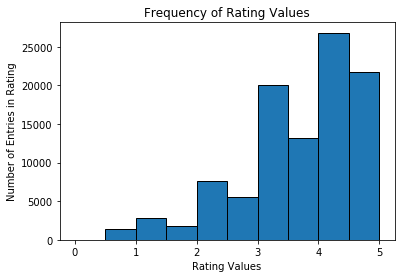

In [91]:
plt.hist(ratings[:,2], bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], edgecolor = "k")
plt.xlabel("Rating Values")

plt.ylabel("Number of Entries in Rating")

plt.title("Frequency of Rating Values")
plt.savefig("histogram.png")
plt.show()
plt.close()

**As we can see from the histogram, the number of entries for the rating values upto 3 is very low
as compared to that for rating values higher than 3. This shows that the users usually rate a
movie, only when they find it above average (i.e., rating>3). Only a small percentage of the users
take the effort to rate the movies when they don’t like it.**

## 3. Plot the distribution of ratings among movies

To be specific,
the X-axis should be the movie index ordered by decreasing frequency and the
Y -axis should be the number of ratings the movie has received.

In [30]:
import numpy as np

In [150]:
b = ratings_df[1].unique() #Gives unique elements, 1 corresponds to movieID
a = ratings_df.groupby(1).size() #Gives the count of each element by its movieID
a_ = np.array(a)
a_


9724

In [156]:
sorted_index_movies = pd.DataFrame({'unique_movieID':b, 'frequency of each movieID':a_})
sorted_index_movies = sorted_index_movies.sort_values(by=['frequency of each movieID'], ascending = False)


In [157]:
y = np.array(sorted_index_movies['frequency of each movieID'])

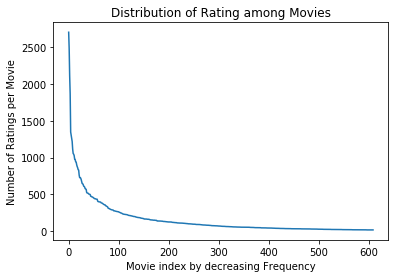

In [170]:
plt.plot(y)

plt.title("Distribution of Rating among Movies")
plt.xlabel("Movie index by decreasing Frequency")
plt.ylabel("Number of Ratings per Movie")


plt.show()
plt.savefig("distribution_of_rating_among_movies.png")

plt.close()

**As we can see from the graph, a small fraction of the movies have a large number of ratings, i.e.,
more than 100. Also, the number of ratings for a large number of movies, after a given point,
stabilises and stays around 10-15 ratings per movie.**

**The plot has the movie indices ordered by decreasing frequency on the X-axis,
and the number of ratings the movie has received on the Y-axis. This plot confirms that our
rating matrices are sparse, which further proves that the collaborative filtering model would be
the best choice for our dataset, even though we can’t guarantee the optimal accuracy.**

In [154]:
#Using for loops to get the same result
'''
#find the unique movie indexes
counter = 0

map = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in map):

        map[ratings[i][1]] = counter

        counter = counter +1
#Count the number of times movie index occured
q3 = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in q3):

        q3[ratings[i][1]] = 1

    else:

        q3[ratings[i][1]] = q3[ratings[i][1]]+1



q3_sorted_keys = sorted(q3, key=q3.get, reverse=True)

x = list()

y = list()

for i in q3_sorted_keys:

    x.append(i)

    y.append(q3[i])



plt.plot(y)

plt.title("Distribution of Rating among Movies")
plt.xlabel("Movie index by decreasing Frequency")
plt.ylabel("Number of Ratings per Movie")


plt.show()
plt.savefig("distribution_of_rating_among_movies.png")

plt.close()
'''

'\n#find the unique movie indexes\ncounter = 0\n\nmap = dict()\n\nfor i in range(0,ratings.shape[0]):\n\n    if(ratings[i][1] not in map):\n\n        map[ratings[i][1]] = counter\n\n        counter = counter +1\n#Count the number of times movie index occured\nq3 = dict()\n\nfor i in range(0,ratings.shape[0]):\n\n    if(ratings[i][1] not in q3):\n\n        q3[ratings[i][1]] = 1\n\n    else:\n\n        q3[ratings[i][1]] = q3[ratings[i][1]]+1\n\n\n\nq3_sorted_keys = sorted(q3, key=q3.get, reverse=True)\n\nx = list()\n\ny = list()\n\nfor i in q3_sorted_keys:\n\n    x.append(i)\n\n    y.append(q3[i])\n\n\n\nplt.plot(y)\n\nplt.title("Distribution of Rating among Movies")\nplt.xlabel("Movie index by decreasing Frequency")\nplt.ylabel("Number of Ratings per Movie")\n\n\nplt.show()\nplt.savefig("distribution_of_rating_among_movies.png")\n\nplt.close()\n'

## 4. Plot distribution of ratings among users

To be specific, the
X-axis should be the user index ordered by decreasing frequency and the Y -axis
should be the number of movies the user have rated.

In [166]:
c = ratings_df[0].unique() #Gives unique elements
d = ratings_df.groupby(0).size() #Gives the count of each element by its movieID
d_ = np.array(d)

len(d_)

610

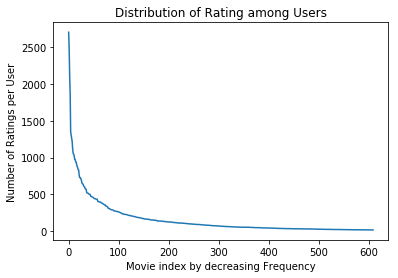

In [169]:
sorted_index_movies = pd.DataFrame({'unique_userID':c, 'frequency of each userID':d_})
sorted_index_movies = sorted_index_movies.sort_values(by=['frequency of each userID'], ascending = False)

y = np.array(sorted_index_movies['frequency of each userID'])

plt.plot(y)

plt.title("Distribution of Rating among Users")
plt.xlabel("Movie index by decreasing Frequency")
plt.ylabel("Number of Ratings per User")


plt.show()
plt.savefig("distribution_of_rating_among_users.png")

plt.close()

**As we can see from the plot, only a small fraction of the users have rated a large number of
movies, i.e., more than 1000. Also, the number of movies rated, for a large number of users, after
a given point, stabilises and stays around 100-150 movies per user.**

In [76]:
'''
q4 = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][0] not in q4):

        q4[ratings[i][0]] = 1

    else:

        q4[ratings[i][0]] = q4[ratings[i][0]]+1



q4_sorted_keys = sorted(q4, key=q4.get, reverse=True)

x = list()

y = list()

for i in q4_sorted_keys:

    x.append(i)

    y.append(q4[i])
    
plt.plot(y)

plt.title("Distribution of Rating among Users")
plt.xlabel("User index by decreasing frequency")
plt.ylabel("Number of Movies the Users have rated")

plt.show()

plt.savefig("distribution_of_ratings_among_users.png")

plt.close()
'''

## Variance of ratings received by movies

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


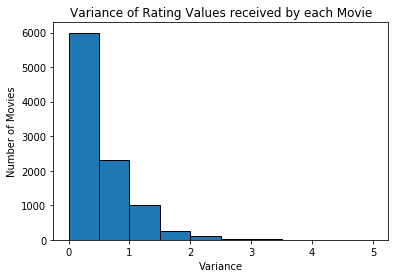

In [90]:
counter = 0

map = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in map):

        map[ratings[i][1]] = counter

        counter = counter+1

                          

data = np.zeros((1000,10000))

data[:] = np.nan

for i in range(0,ratings.shape[0]):

    data[ratings[i][0].astype(int)][map[ratings[i][1]]] = ratings[i][2]



q5 = np.square(np.nanstd(data,axis = 0))

bins = [0,0.5,1.0,1.5,2,2.5,3,3.5,4,4.5,5,5.5]

h, bins = np.histogram(q5, bins=bins, range=(min(bins),max(bins)))

plt.hist(bins[0:11],weights = h,edgecolor="k")



plt.title("Variance of Rating Values received by each Movie")
plt.xlabel("Variance")
plt.ylabel("Number of Movies")

plt.show()

plt.savefig("variance_of_ratings_by_movies.png")

plt.close()



**As we can see from the graph, maximum number of movies have a variance of the ratings in the
range of 0-0.5. This shows that for most of the movies, the ratings given by users don’t differ by
much, and are usually the same. Also, as the variance increases, the number of movies lying in
the range decreases, showing that very few movies have such contrasting ratings.**